In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Random2DGaussian():
    def __init__(self, minx=0, maxx=10, miny=0, maxy=10):
        self.mean = (np.random.random_sample() * (maxx - minx) + minx,
                     np.random.random_sample() * (maxy - miny) + miny)
        
        eigvals = (np.random.random_sample(2) * [maxx - minx, maxy - miny] / 5)**2
        
        theta = np.random.random_sample() * 2 * np.pi
        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
        
        self.variance = np.dot(np.dot(np.transpose(R), np.diag(eigvals)), R)
        
    def get_sample(self, n):
        return np.random.multivariate_normal(self.mean, self.variance, n)

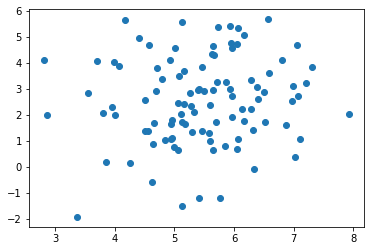

In [3]:
np.random.seed(100)

G=Random2DGaussian()
X=G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
def binlogreg_train(X, Y_, param_niter=100, param_delta=0.6, verbose=False):
    '''
    Argumenti
      X:  podatci, np.array Nx2
      Y_: indeksi razreda, np.array Nx1

    Povratne vrijednosti
      w, b: parametri logističke regresije
    '''
    
    w = np.random.randn(2, 1) # N(0,1) 2 x 1
    b = 0
    
    for i in range(param_niter):
        # klasifikacijske mjere
        scores = np.dot(X, w) + b # N x 1
        
        # vjerojatnosti razreda c1
        probs = np.exp(scores) / (1 + np.exp(scores)) # N x 1
        
        # gubitak
        loss = -np.sum(np.log(probs)) # scalar
        
        # dijagnostički ispis
        if verbose and i % 10 == 0:
            print("iteration {}: loss {}".format(i, loss))
        
        # derivacije gubitka po klasifikacijskim mjerama
        dL_dscores = probs - Y_ # N x 1
        
        N = len(X)
        #gradijenti parametara
        grad_w = np.sum(np.dot(X.transpose(), dL_dscores), axis=1, keepdims=True) / N # D x 1
        grad_b = np.sum(dL_dscores) / N # 1 x 1
        
        print(grad_w.shape)

        #poboljsani parametri
        w += -param_delta * grad_w
        b += -param_delta * grad_b
        
    return w, b

In [5]:
def binlogreg_classify(X, w, b):
    '''
      Argumenti
        X:    podatci, np.array Nx2
        w, b: parametri logističke regresije
    
      Povratne vrijednosti
        probs: vjerojatnosti razreda c1
    '''
    
    # klasifikacijski rezultat
    scores = np.dot(X, w.reshape(-1, 1)) + b # N x 1
    
    # vjerojatnost razreda c1
    probs = np.exp(scores) / (1 + np.exp(scores)) # N x 1
    
    return probs

In [6]:
def sample_gauss_2d(C, N):
    G = Random2DGaussian()
    X = G.get_sample(N)
    Y = np.array([[0]] * N)

    for i in range(1, C):
        G = Random2DGaussian()
        X = np.vstack((X, G.get_sample(N)))
        Y = np.vstack((Y, [[i]] * N))
    
    return X, Y

In [7]:
def get_statistical_data(Y, Y_):
    good = Y[np.where(Y == Y_)]
    bad = Y[np.where(Y != Y_)]
    
    TP = len(good[np.where(good == 1)])
    TN = len(good[np.where(good == 0)])
    FP = len(bad[np.where(bad == 1)])
    FN = len(bad[np.where(bad == 0)])
    
    return TP, TN, FP, FN

def get_accuracy(TP, TN, FP, FN):
    return (1. * TP + TN) / (TP + TN + FP + FN)

def get_recall(TP, FN):
    return (1. * TP) / (TP + FN)

def get_precision(TP, FP):
    return (1. * TP) / (TP + FP)

In [8]:
def eval_perf_binary(Y, Y_):
    TP, TN, FP, FN = get_statistical_data(Y, Y_)
    
    accuracy = get_accuracy(TP, TN, FP, FN)
    recall = get_recall(TP, FN)
    precision = get_precision(TP, FP)
    
    return accuracy, recall, precision

In [9]:
def average_precision_at_index(Yranked, index):
    if index > len(Yranked):
        raise Exception("Index out of range")
        
    Ypredicted = np.zeros(Yranked.shape)
    Ypredicted[index:]=1
    TP, TN, FP, FN = get_statistical_data(Ypredicted, Yranked)
    
    if TP == 0 and FP == 0:
        return 0.0
    return get_precision(TP, FP)
    
def eval_AP(Yranked):
    numerator = np.sum([average_precision_at_index(Yranked,index) * element for index, element in enumerate(Yranked)])
    denominator = np.sum(Yranked)
    return numerator / denominator

In [10]:
np.random.seed(100)

# get the training dataset
X, Y_ = sample_gauss_2d(2, 100)

# train the model
w, b = binlogreg_train(X, Y_)

# evaluate the model on the training dataset
probs = binlogreg_classify(X, w, b)
Y = probs > 0.5

# report performance
accuracy, recall, precision = eval_perf_binary(Y, Y_)
AP = eval_AP(Y_[probs.argsort()])
print('Accuracy: {}\tRecall: {}\tPrecision: {}\tAP: {}'.format(accuracy, recall, precision, AP))

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
Accuracy: 0.97	Recall: 0.99	Precision: 0.9519230769230769	AP: nan


<ipython-input-9-4c359f0440f1>:16: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


In [11]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores.reshape(-1, 1)

In [12]:
def graph_data(X, Y_, Y):
    '''
      X  ... podatci (np.array dimenzija Nx2)
      Y_ ... točni indeksi razreda podataka (Nx1)
      Y  ... predviđeni indeksi razreda podataka (Nx1)
    '''
    
    correctly_classified = X[np.where(Y == Y_)[0]]
    incorrectly_classified = X[np.where(Y != Y_)[0]]
    
    colors = np.array([(y == 0) * 1 + (y == 1) * 0.3 for y in Y_])
    
    color_correct = colors[np.where(Y == Y_)[0]]
    color_incorrect = colors[np.where(Y != Y_)[0]]
    
    plt.scatter(correctly_classified[:,0], correctly_classified[:,1],
                color=np.repeat(color_correct, 3, axis=1), marker='o', edgecolors=(0,0,0), linewidths=0.5)
    plt.scatter(incorrectly_classified[:,0], incorrectly_classified[:,1],
                color=np.repeat(color_incorrect, 3, axis=1), marker='s', edgecolors=(0,0,0), linewidths=0.5)

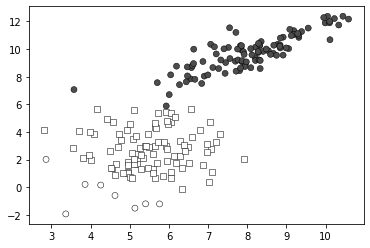

In [13]:
np.random.seed(100)
  
# get the training dataset
X, Y_ = sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X) > 0.5

# graph the data points
graph_data(X, Y_, Y) 

# show the results
plt.show()

In [14]:
def graph_surface(function, rect, offset=0.5, width=256, height=256):
  """Creates a surface plot (visualize with plt.show)

  Arguments:
    function: surface to be plotted
    rect:     function domain provided as:
              ([x_min,y_min], [x_max,y_max])
    offset:   the level plotted as a contour plot

  Returns:
    None
  """

  # lsw i lsh nam oznacuju potprostor unutar kojeg crtamo ovo - ovdje radimo 1D koordinatne raspone rezolucije
  lsw = np.linspace(rect[0][1], rect[1][1], width) 
  lsh = np.linspace(rect[0][0], rect[1][0], height)
  # radimo 2D koordinatnu mrezu unutar koje prikazujemo plohu
  xx0,xx1 = np.meshgrid(lsh, lsw)
  grid = np.stack((xx0.flatten(),xx1.flatten()), axis=1)

  #get the values and reshape them - zovemo decizijsku funkciju, te sve primjere sa reshape raspoređujemo u dimenziju ekrana
  values=function(grid).reshape((width,height))
  
  # fix the range and offset
  delta = offset if offset else 0
  maxval=max(np.max(values)-delta, - (np.min(values)-delta))
  
  # draw the surface and the offset
  plt.pcolormesh(xx0, xx1, values, 
     vmin=delta-maxval, vmax=delta+maxval)
    
  # crtamo plohu duz koje decizijska funkcija poprima vrijednost offset  
  if offset != None:
    plt.contour(xx0, xx1, values, colors='black', levels=[offset])

<ipython-input-14-9511a512f2e9>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


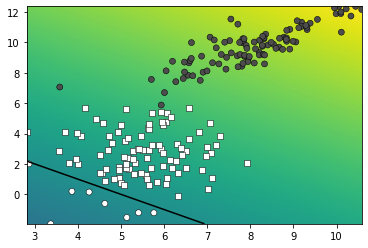

In [15]:
np.random.seed(100)
  
# get the training dataset
X, Y_ = sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X) > 0.5

# graph the surface
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(myDummyDecision, bbox, offset=0)

# graph the data points
graph_data(X, Y_, Y)

# show the results
plt.show()

In [16]:
def binlogreg_decfun(w, b):
    def classify(X):
        return binlogreg_classify(X, w, b)
    return classify

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
0.97 0.99 0.9519230769230769 0.9965767601252744


<ipython-input-14-9511a512f2e9>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


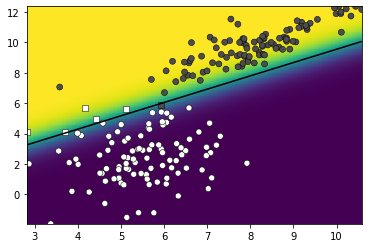

In [17]:
np.random.seed(100)

# instantiate the dataset
X,Y_ = sample_gauss_2d(2, 100)

# train the logistic regression model
w, b = binlogreg_train(X, Y_)

# evaluate the model on the train set
probs = binlogreg_classify(X, w, b)

# recover the predicted classes Y
Y = probs > 0.5
Y = Y.reshape(-1, 1)

# evaluate and print performance measures
acc, recall, precision = eval_perf_binary(Y, Y_)
AP = eval_AP(Y_[probs.flatten().argsort()])
print(acc, recall, precision, AP)

# graph the decision surface
decfun = binlogreg_decfun(w, b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(decfun, bbox, offset=0.5)

# graph the data points
graph_data(X, Y_, Y)

# show the plot
plt.show()

<b>6. Višerazredna logistička regresija </b>

In [27]:
# funkcija logreg_train
# argumenti - podaci X i točni razredi Y_
# izlaz - "podešeni" w i b
# imamo podatak dimenzije 2 (npr. (0.5 0.1)) i trebamo odrediti kojem od 
# j razreda pripada
# koristimo softmax
from data import class_to_onehot

def logreg_train(X, Y_, param_niter=1000, param_delta=0.01):
    # eksponencirane klasifikacijske mjere
    # pri računanju softmaksa obratite pažnju
    # na odjeljak 4.1 udžbenika
    # (Deep Learning, Goodfellow et al)!
    
    w = np.random.randn(2, np.max(Y_) + 1)
    b = np.zeros(np.max(Y_) + 1)
    #print(w)
    #print(b)
    
    for i in range(param_niter):
        # predikcija
        scores = np.dot(X, w) + b    # N x C
        #print("X shape", X.shape)
        #print("scores.shape: ", scores.shape)

        # logaritmirane vjerojatnosti razreda 
        probs = stable_softmax(scores)     # N x C
        logprobs = np.log(probs)  # N x C
        
        y_array = np.concatenate(Y_)
        y_one_hot = class_to_onehot(y_array)
        #print(y_array)
        #print(y_one_hot)

        # gubitak
        n = len(X)
        loss  = (-1/n)*np.sum((logprobs * y_one_hot))    # scalar
        
        # dijagnostički ispis
        if i % 10 == 0:
          #print(logprobs * y_one_hot, "dot")
          print("iteration {}: loss {}".format(i, loss))

        # derivacije komponenata gubitka po mjerama
        dL_ds = probs - Y_     # N x C -> ovo je Gs!

        # gradijenti parametara
        grad_W = 1/n * np.dot(X.transpose(),dL_ds)    # C x D (ili D x C)
        grad_b = np.sum(dL_ds.transpose(), axis=1)    # C x 1 (ili 1 x C)

        # poboljšani parametri
        #print("grad w shape", grad_W.shape)
        w += -param_delta * grad_W
        b += -param_delta * grad_b
    return w,b

# stabilni softmax - poglavlje 4.1 Deeplearningbook
def stable_softmax(x):
    exp_x_shifted = np.exp(x - np.max(x))
    probs = exp_x_shifted / np.sum(exp_x_shifted, axis = 1)[:, np.newaxis]
    return probs


In [20]:
# prima podatke X te model logističke regresije zadan sa w i b
# vraća matricu dimenzija NxC gdje svaki redak i sadrži vjerojatnosti klasificiranja podatka xiu razrede cj
def logreg_classify(X, w, b):
    
    # izlaz modela
    scores = np.dot(X, w) + b #N x D
    
    # vjerojatnosti razreda
    probs = stable_softmax(scores) #N x D
    return probs

In [21]:
# evaluacijske mjere za višeklasnu klasifikaciju
def eval_perf_multi(Y, Y_):
  pr = []
  n = max(Y_)+1
  M = np.bincount(n * Y_ + Y, minlength=n*n).reshape(n, n)
  for i in range(n):
    tp_i = M[i,i]
    fn_i = np.sum(M[i,:]) - tp_i
    fp_i = np.sum(M[:,i]) - tp_i
    tn_i = np.sum(M) - fp_i - fn_i - tp_i
    recall_i = tp_i / (tp_i + fn_i)
    precision_i = tp_i / (tp_i + fp_i)
    pr.append( (recall_i, precision_i) )
  
  accuracy = np.trace(M)/np.sum(M)
  
  return accuracy, pr, M

In [28]:
# instantiate the dataset
X,Y_ = sample_gauss_2d(3, 100)

# train the logistic regression model
w, b = logreg_train(X, Y_)

# evaluate the model on the train set
probs = logreg_classify(X, w, b)
#print(probs)

# recover the predicted classes Y
Y = probs > 0.5
Y = Y.reshape(-1, 1)

iteration 0: loss 3.5152373447364096
iteration 10: loss 2.419963203863437
iteration 20: loss 2.110074784510896
iteration 30: loss 1.8537188477834712
iteration 40: loss 1.654757762200895
iteration 50: loss 1.5043685448269644
iteration 60: loss 1.3905593080670735
iteration 70: loss 1.30340075559161
iteration 80: loss 1.235915475953279
iteration 90: loss 1.1832237046796632
iteration 100: loss 1.14177573430349
iteration 110: loss 1.1089055828578278
iteration 120: loss 1.082589171062262
iteration 130: loss 1.0612977111005648
iteration 140: loss 1.0438912293902751
iteration 150: loss 1.0295327668310836
iteration 160: loss 1.0176177802045454
iteration 170: loss 1.0077167380368985
iteration 180: loss 0.9995292082866892
iteration 190: loss 0.992847605865708
iteration 200: loss 0.9875288196184515
iteration 210: loss 0.9834721599357263
iteration 220: loss 0.9806023586281125
iteration 230: loss 0.978856644277973
iteration 240: loss 0.978175175430132
iteration 250: loss 0.9784943230880211
iteration